In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [109]:
def ar1_data_generate(phi = 0.8, sigma = 1, length = 100, num_series = 1000, seed = 12345):

    arparams = np.array([phi])
    maparams = np.array([0])
    ar = np.r_[1, -arparams] # include zero-lag and use an opposite sign, see note below
    ma = np.r_[1, maparams] # include zero-lag

    ar1_np = np.zeros((num_series, length+20, 1))
    for i in range(num_series):
        # generate data
        # np.random.seed(seed+i)
        ar1_np[i,:,0] = sm.tsa.arma_generate_sample(ar, ma, nsample = length+20, scale = sigma) # y_{0},...\y_{99}
    return ar1_np[:,20:,:] # 發現series前面的 variance 不是 marginal variance (\sigma^2/(1-\phi^2)), so burn out

def range_normalization(data, num_normalized):
    '''
    將每一條 ts 做 normalization (x-min)/(max - min)
    
    input:  npy (obs, length, channel)
    output: npy (obs, length, channel)
    '''

    obs = data.shape[0]
    channel = data.shape[2]

    min_value = np.min(data[:, 0:num_normalized, :], axis = 1).reshape(obs, 1, channel)
    max_value = np.max(data[:, 0:num_normalized, :], axis = 1).reshape(obs, 1, channel)
    
    data_normalized = (data - min_value)/(max_value - min_value)

    return data_normalized    

In [104]:
train_ar1_50000_100 = ar1_data_generate(phi = 0.8, sigma = 1, length = 100, num_series = 50000, seed = 1)
test_ar1_5000_100 = ar1_data_generate(phi = 0.8, sigma = 1, length = 100, num_series = 5000, seed = 12345)

In [107]:
print(train_ar1_50000_100.shape)
print(test_ar1_5000_100.shape)

(50000, 100, 1)
(5000, 100, 1)


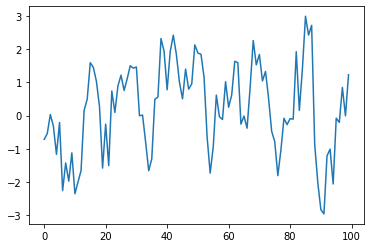

In [101]:
plt.plot(train_ar1_50000_100[0,:,0])

In [111]:
np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/train_ar1_50000_100.npy', train_ar1_50000_100)
np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/test_ar1_5000_100.npy', test_ar1_5000_100)

In [112]:
train_ar1_50000_100_stdd = range_normalization(train_ar1_50000_100, 99)
test_ar1_5000_100_stdd = range_normalization(test_ar1_5000_100, 99)

np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/train_ar1_50000_100_stdd.npy', train_ar1_50000_100_stdd)
np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/test_ar1_5000_100_stdd.npy', test_ar1_5000_100_stdd)

In [93]:
np.var(train_ar1_50000_200[:,0,0])

2.792213619431006

In [94]:
1/(1-0.8*0.8) # Y_t marginal variance

2.7777777777777786

In [113]:
train_ar1_50000_100 = np.load('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/train_ar1_50000_100.npy')

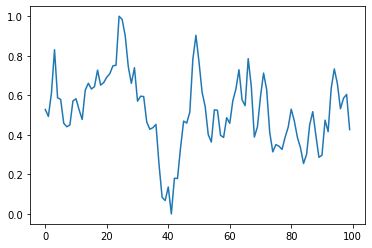

In [116]:
plt.plot(train_ar1_50000_100_stdd[0,:,:])